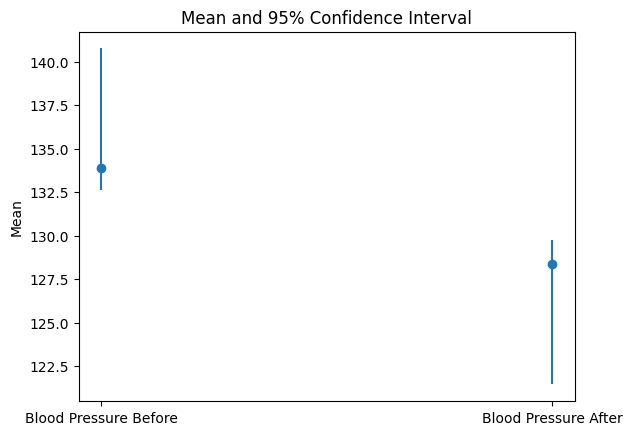

a. Measure the dispersion:
Dispersion in 'Blood Pressure Before': 43.10
Dispersion in 'Blood Pressure After': 46.97

b. Calculate mean and 5% confidence interval and plot it in a graph:
Mean and 95% Confidence Interval of 'Blood Pressure Before': 133.91 (132.60075849172767, 135.21924150827232)
Mean and 95% Confidence Interval of 'Blood Pressure After': 128.36 (126.99326697818071, 129.7267330218193)

c. Calculate the Mean Absolute Deviation and Standard Deviation:
Mean Absolute Deviation (MAD) in 'Blood Pressure Before': 5.71
Mean Absolute Deviation (MAD) in 'Blood Pressure After': 5.90
Standard Deviation (SD) in 'Blood Pressure Before': 6.57
Standard Deviation (SD) in 'Blood Pressure After': 6.85

d. Calculate the correlation coefficient and check the significance:
Correlation Coefficient: 0.98
P-value: 0.0000
Is the correlation significant at the 1% level? Yes


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=sharing'
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(download_url)

# Extract the 'Blood Pressure Before' and 'Blood Pressure After' columns
bp_before = data[' Blood Pressure Before (mmHg)']
bp_after = data[' Blood Pressure After (mmHg)']

# a. Measure the dispersion in both and interpret the results
dispersion_before = np.var(bp_before)
dispersion_after = np.var(bp_after)
interpretation_dispersion = f"Dispersion in 'Blood Pressure Before': {dispersion_before:.2f}\n" \
                            f"Dispersion in 'Blood Pressure After': {dispersion_after:.2f}"

# b. Calculate mean and 5% confidence interval and plot it in a graph
mean_before = np.mean(bp_before)
mean_after = np.mean(bp_after)
confidence_interval_before = stats.t.interval(0.95, len(bp_before)-1, loc=mean_before, scale=stats.sem(bp_before))
confidence_interval_after = stats.t.interval(0.95, len(bp_after)-1, loc=mean_after, scale=stats.sem(bp_after))

# Plot the means with error bars representing the confidence intervals
labels = ['Blood Pressure Before', 'Blood Pressure After']
means = [mean_before, mean_after]
confidence_intervals = [confidence_interval_before, confidence_interval_after]

plt.errorbar(labels, means, yerr=np.abs(np.subtract(confidence_intervals, means)).T, fmt='o')
plt.ylabel('Mean')
plt.title('Mean and 95% Confidence Interval')
plt.show()

# c. Calculate the Mean Absolute Deviation and Standard Deviation and interpret the results
mad_before = np.mean(np.abs(bp_before - np.mean(bp_before)))
mad_after = np.mean(np.abs(bp_after - np.mean(bp_after)))
std_before = np.std(bp_before)
std_after = np.std(bp_after)
interpretation_mad_sd = f"Mean Absolute Deviation (MAD) in 'Blood Pressure Before': {mad_before:.2f}\n" \
                        f"Mean Absolute Deviation (MAD) in 'Blood Pressure After': {mad_after:.2f}\n" \
                        f"Standard Deviation (SD) in 'Blood Pressure Before': {std_before:.2f}\n" \
                        f"Standard Deviation (SD) in 'Blood Pressure After': {std_after:.2f}"

# d. Calculate the correlation coefficient and check the significance of it at 1% level of significance
correlation_coefficient, p_value = stats.pearsonr(bp_before, bp_after)
is_significant = p_value < 0.01
interpretation_correlation = f"Correlation Coefficient: {correlation_coefficient:.2f}\n" \
                             f"P-value: {p_value:.4f}\n" \
                             f"Is the correlation significant at the 1% level? {'Yes' if is_significant else 'No'}"

# Output the results
print("a. Measure the dispersion:")
print(interpretation_dispersion)
print()
print("b. Calculate mean and 5% confidence interval and plot it in a graph:")
print(f"Mean and 95% Confidence Interval of 'Blood Pressure Before': {mean_before:.2f} {confidence_interval_before}")
print(f"Mean and 95% Confidence Interval of 'Blood Pressure After': {mean_after:.2f} {confidence_interval_after}")
print()
print("c. Calculate the Mean Absolute Deviation and Standard Deviation:")
print(interpretation_mad_sd)
print()
print("d. Calculate the correlation coefficient and check the significance:")
print(interpretation_correlation)
